In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat          eldeco accolade  sohna road   0.73          5753.0   
1          flat        dlf regal gardens   sector 90   1.29          9021.0   
2          flat            m3m woodshire  sector 107   0.75          5490.0   
3          flat  adani m2k oyster grande  sector 102   2.50          7817.0   
4          flat            pyramid urban  sector 67a   0.60          8571.0   

   bedRoom  bathroom balcony  floorNum   agePossession  built_up_area  \
0      2.0       2.0       3       9.0  Relatively New         1148.0   
1      3.0       3.0       3       7.0  Relatively New         1540.0   
2      2.0       2.0      3+      14.0  Relatively New         1201.0   
3      4.0       5.0      3+      10.0  Relatively New         2600.0   
4      2.0       2.0       2      14.0    New Property          633.0   

   servant room  pooja room  study room  others  store room  furnishing_type  \
0           0.0         1.0         0.0     0.0         0.0              0.0   
1           0.0         0.0         1.0     0.0         0.0              0.0   
2           0.0         1.0         0.0     0.0         0.0              0.0   
3           1.0         1.0         0.0     0.0         0.0              1.0   
4           0.0         0.0         0.0     0.0         0.0              0.0   

   luxury_score  
0         133.0  
1         224.0  
2         228.0  
3         228.0  
4          19.0

### Geo Map

In [5]:
latlong = pd.read_csv('latlong.csv')

In [6]:
latlong.head()

sector             coordinates
0  sector 1  28.3663° N, 76.9456° E
1  sector 2  28.5095° N, 77.0320° E
2  sector 3  28.4909° N, 77.0176° E
3  sector 4  28.4738° N, 77.0107° E
4  sector 5  28.4794° N, 77.0176° E

In [7]:
latlong['latitude'] = latlong['coordinates'].str.strip().str.split(',').str.get(0).str.split('°').str.get(0).str.strip().astype(float)

In [8]:
latlong['longitude'] = latlong['coordinates'].str.strip().str.split(',').str.get(1).str.split('°').str.get(0).str.strip().astype(float)

In [9]:
latlong.head()

sector             coordinates  latitude  longitude
0  sector 1  28.3663° N, 76.9456° E   28.3663    76.9456
1  sector 2  28.5095° N, 77.0320° E   28.5095    77.0320
2  sector 3  28.4909° N, 77.0176° E   28.4909    77.0176
3  sector 4  28.4738° N, 77.0107° E   28.4738    77.0107
4  sector 5  28.4794° N, 77.0176° E   28.4794    77.0176

In [10]:
new_df = df.merge(latlong,on='sector')

In [11]:
new_df.head()

property_type               society     sector  price  price_per_sqft  \
0          flat     dlf regal gardens  sector 90   1.29          9021.0   
1          flat           green court  sector 90   0.40          6390.0   
2          flat  dlf new town heights  sector 90   1.51          6387.0   
3          flat     dlf regal gardens  sector 90   1.25          5930.0   
4          flat  shree vardhman flora  sector 90   0.90          4615.0   

   bedRoom  bathroom balcony  floorNum   agePossession  ...  servant room  \
0      3.0       3.0       3       7.0  Relatively New  ...           0.0   
1      2.0       2.0       1       8.0    New Property  ...           0.0   
2      4.0       4.0      3+       6.0  Relatively New  ...           1.0   
3      3.0       3.0       3      18.0  Relatively New  ...           0.0   
4      3.0       4.0       3       4.0  Relatively New  ...           1.0   

   pooja room  study room  others  store room  furnishing_type  luxury_score  \
0         0.0         1.0     0.0         0.0              0.0         224.0   
1         0.0         0.0     0.0         0.0              0.0          24.0   
2         1.0         0.0     0.0         0.0              1.0         187.0   
3         0.0         0.0     1.0         0.0              0.0          85.0   
4         0.0         0.0     0.0         0.0              0.0         219.0   

              coordinates latitude  longitude  
0  28.4085° N, 76.9369° E  28.4085    76.9369  
1  28.4085° N, 76.9369° E  28.4085    76.9369  
2  28.4085° N, 76.9369° E  28.4085    76.9369  
3  28.4085° N, 76.9369° E  28.4085    76.9369  
4  28.4085° N, 76.9369° E  28.4085    76.9369  

[5 rows x 21 columns]

In [12]:
group_new_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [13]:
group_new_df.head()

price  price_per_sqft  built_up_area  latitude  longitude
sector                                                                   
gwal pahari  3.192222     9585.777778    3056.166667   28.4484    77.0210
manesar      0.962258     4608.064516    2027.367742   28.3515    76.9428
sector 1     1.860000     8249.833333    2327.833333   28.3663    76.9456
sector 102   1.696636    10603.822430    1556.130841   28.4750    76.9715
sector 103   1.495000     7445.785714    1865.428571   28.4949    76.9845

In [14]:
fig_new_df = px.scatter_mapbox(group_new_df,lat='latitude',lon='longitude',color='price_per_sqft',size='built_up_area',
                              color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, mapbox_style="open-street-map",
                               text=group_new_df.index)
fig_new_df.show()

In [15]:
new_df.to_csv('vizdata1.csv',index=False)

### Word CLoud

In [16]:
df1 = pd.read_csv('Gurgaon_properties.csv')

In [17]:
df1.head()

property_name property_type                  society  \
0               2 BHK Flat in Sohna          flat          eldeco accolade   
1   3 BHK Flat in Sector 90 Gurgaon          flat        dlf regal gardens   
2  2 BHK Flat in Sector 107 Gurgaon          flat            m3m woodshire   
3  4 BHK Flat in Sector 102 Gurgaon          flat  adani m2k oyster grande   
4  2 BHK Flat in Sector 67A Gurgaon          flat            pyramid urban   

   price  price_per_sqft    area  \
0   0.73          5752.0  1269.0   
1   1.29          9020.0  1430.0   
2   0.75          5490.0  1366.0   
3   2.50          7817.0  3198.0   
4   0.60          8571.0   700.0   

                                        areaWithType  bedRoom  bathroom  \
0             Super Built up area 1269(117.89 sq.m.)        2         2   
1  Super Built up area 1702(158.12 sq.m.)Built Up...        3         3   
2  Super Built up area 1366(126.91 sq.m.)Carpet a...        2         2   
3  Super Built up area 3198(297.1 sq.m.)Built Up ...        4         5   
4               Super Built up area 700(65.03 sq.m.)        2         2   

  balcony           additionalRoom  \
0       3               pooja room   
1       3               study room   
2      3+               pooja room   
3      3+  servant room,pooja room   
4       2            not available   

                                             address  floorNum      facing  \
0                      0001, Sohna, Gurgaon, Haryana       9.0  North-East   
1          E174, Sector 90 Gurgaon, Gurgaon, Haryana       7.0        East   
2  Dwarka Exway, Sector 107 Gurgaon, Gurgaon, Har...      14.0        West   
3          704, Sector 102 Gurgaon, Gurgaon, Haryana      10.0  North-East   
4               Sector 67A Gurgaon, Gurgaon, Haryana      14.0         NaN   

     agePossession                                    nearbyLocations  \
0  1 to 5 Year Old  ['Global City Centre', 'Sohna Road', 'Damdama ...   
1  1 to 5 Year Old  ['SS Omnia, Sector 86', 'Numberdar market, IMT...   
2  1 to 5 Year Old  ['Signum 107', 'Nora Solomon Medicenter', 'Ind...   
3  1 to 5 Year Old  ['WTC Plaza', 'Star Mall', 'Dwarka Expy, Dhanw...   
4  0 to 1 Year Old  ['Airia Mall, Sector 68', 'M3M Cosmopolitan Ma...   

                                         description  \
0  Eldeco accolade in sohna, gurgaon is a ready-T...   
1  Looking for a 3 bhk property for sale in gurga...   
2  Available 2 bhk spacious apartment in m3m wood...   
3  Located in the popular residential address of ...   
4  We are the proud owners of this 2 bhk apartmen...   

                                      furnishDetails  \
0                                                NaN   
1                                                NaN   
2  ['5 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...   
3  ['6 Fan', '1 Exhaust Fan', '1 Stove', '5 Light...   
4                                                 []   

                                            features  \
0  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...   
1  ['Centrally Air Conditioned', 'Water purifier'...   
2  ['Centrally Air Conditioned', 'Water purifier'...   
3  ['Centrally Air Conditioned', 'Water purifier'...   
4             ['Lift(s)', 'Park', 'Shopping Centre']   

                                              rating  
0  ['Green Area5 out of 5', 'Construction4.5 out ...  
1  ['Green Area5 out of 5', 'Construction4.5 out ...  
2  ['Green Area4.5 out of 5', 'Construction5 out ...  
3  ['Green Area5 out of 5', 'Construction4.5 out ...  
4  ['Environment5 out of 5', 'Lifestyle4 out of 5...

In [18]:
df_wordcloud = df1.merge(df,left_index=True,right_index=True)

In [19]:
df_wordcloud = df_wordcloud[['features','sector']]

In [20]:
df_wordcloud

features      sector
0     ['Security / Fire Alarm', 'Feng Shui / Vaastu ...  sohna road
1     ['Centrally Air Conditioned', 'Water purifier'...   sector 90
2     ['Centrally Air Conditioned', 'Water purifier'...  sector 107
3     ['Centrally Air Conditioned', 'Water purifier'...  sector 102
4                ['Lift(s)', 'Park', 'Shopping Centre']  sector 67a
...                                                 ...         ...
3549  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...  sector 111
3550  ['Power Back-up', 'Intercom Facility', 'Lift(s...   sector 70
3551  ['Centrally Air Conditioned', 'Water purifier'...   sector 69
3552  ['Feng Shui / Vaastu Compliant', 'Security / F...  sohna road
3553  ['Security / Fire Alarm', 'Power Back-up', 'Fe...   sector 71

[3554 rows x 2 columns]

In [22]:
import ast
list_features = []
for i in df_wordcloud['features'].dropna().apply(ast.literal_eval):
    list_features.extend(i)

In [23]:
list_features

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'L

In [24]:
list_features = ' '.join(list_features)

In [25]:
import pickle
pickle.dump(list_features,open('list_features.pkl','wb'))

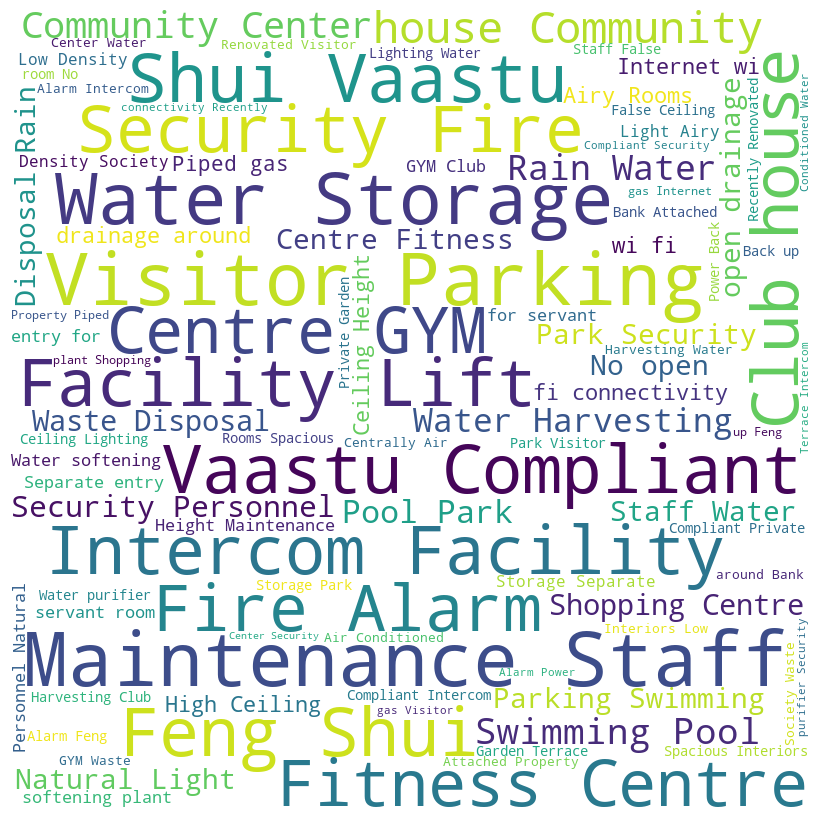

In [26]:
from wordcloud import WordCloud

#plt.rcParams["font.family"] = "Arial"
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']), min_font_size = 10).generate(list_features)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

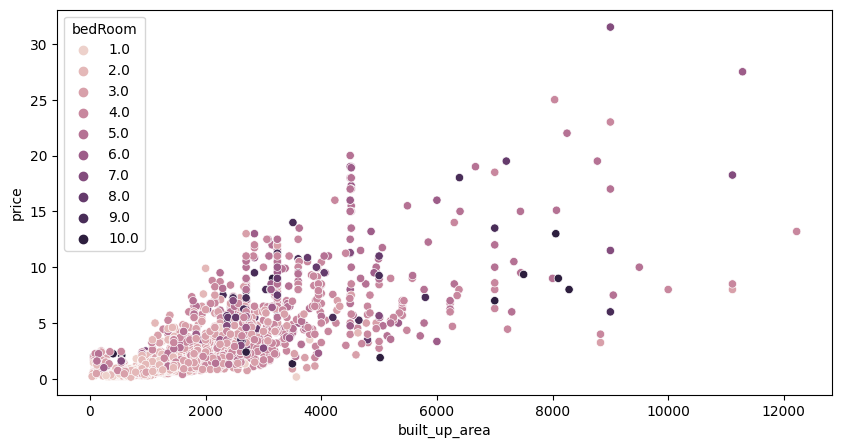

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(new_df,x='built_up_area',y='price',hue='bedRoom',legend='full')

In [43]:
new_df.head()

property_type               society     sector  price  price_per_sqft  \
0          flat     dlf regal gardens  sector 90   1.29          9021.0   
1          flat           green court  sector 90   0.40          6390.0   
2          flat  dlf new town heights  sector 90   1.51          6387.0   
3          flat     dlf regal gardens  sector 90   1.25          5930.0   
4          flat  shree vardhman flora  sector 90   0.90          4615.0   

   bedRoom  bathroom balcony  floorNum   agePossession  ...  servant room  \
0      3.0       3.0       3       7.0  Relatively New  ...           0.0   
1      2.0       2.0       1       8.0    New Property  ...           0.0   
2      4.0       4.0      3+       6.0  Relatively New  ...           1.0   
3      3.0       3.0       3      18.0  Relatively New  ...           0.0   
4      3.0       4.0       3       4.0  Relatively New  ...           1.0   

   pooja room  study room  others  store room  furnishing_type  luxury_score  \
0         0.0         1.0     0.0         0.0              0.0         224.0   
1         0.0         0.0     0.0         0.0              0.0          24.0   
2         1.0         0.0     0.0         0.0              1.0         187.0   
3         0.0         0.0     1.0         0.0              0.0          85.0   
4         0.0         0.0     0.0         0.0              0.0         219.0   

              coordinates latitude  longitude  
0  28.4085° N, 76.9369° E  28.4085    76.9369  
1  28.4085° N, 76.9369° E  28.4085    76.9369  
2  28.4085° N, 76.9369° E  28.4085    76.9369  
3  28.4085° N, 76.9369° E  28.4085    76.9369  
4  28.4085° N, 76.9369° E  28.4085    76.9369  

[5 rows x 21 columns]

In [45]:
px.pie(data_frame = df, names='bedRoom')

In [46]:
new_df

property_type                       society     sector  price  \
0             flat             dlf regal gardens  sector 90   1.29   
1             flat                   green court  sector 90   0.40   
2             flat          dlf new town heights  sector 90   1.51   
3             flat             dlf regal gardens  sector 90   1.25   
4             flat          shree vardhman flora  sector 90   0.90   
...            ...                           ...        ...    ...   
3288          flat               surya vihar rwa  sector 21   1.30   
3289          flat  takshila heights sector 37 c  sector 37   0.67   
3290         house                   dlf alameda  sector 73  17.00   
3291          flat               today callidora  sector 73   1.00   
3292          flat               today callidora  sector 73   0.90   

      price_per_sqft  bedRoom  bathroom balcony  floorNum       agePossession  \
0             9021.0      3.0       3.0       3       7.0      Relatively New   
1             6390.0      2.0       2.0       1       8.0        New Property   
2             6387.0      4.0       4.0      3+       6.0      Relatively New   
3             5930.0      3.0       3.0       3      18.0      Relatively New   
4             4615.0      3.0       4.0       3       4.0      Relatively New   
...              ...      ...       ...     ...       ...                 ...   
3288          6500.0      5.0       5.0       2       2.0        Old Property   
3289          5583.0      2.0       2.0       2       3.0      Relatively New   
3290         35109.0      5.0       8.0       3       3.0      Relatively New   
3291          7692.0      2.0       2.0       2      13.0        New Property   
3292          5549.0      3.0       3.0       3       3.0  Under Construction   

      ...  servant room  pooja room  study room  others  store room  \
0     ...           0.0         0.0         1.0     0.0         0.0   
1     ...           0.0         0.0         0.0     0.0         0.0   
2     ...           1.0         1.0         0.0     0.0         0.0   
3     ...           0.0         0.0         0.0     1.0         0.0   
4     ...           1.0         0.0         0.0     0.0         0.0   
...   ...           ...         ...         ...     ...         ...   
3288  ...           1.0         0.0         1.0     0.0         1.0   
3289  ...           0.0         0.0         0.0     0.0         0.0   
3290  ...           1.0         1.0         1.0     0.0         1.0   
3291  ...           0.0         0.0         0.0     0.0         0.0   
3292  ...           1.0         0.0         0.0     0.0         0.0   

      furnishing_type  luxury_score             coordinates latitude  \
0                 0.0         224.0  28.4085° N, 76.9369° E  28.4085   
1                 0.0          24.0  28.4085° N, 76.9369° E  28.4085   
2                 1.0         187.0  28.4085° N, 76.9369° E  28.4085   
3                 0.0          85.0  28.4085° N, 76.9369° E  28.4085   
4                 0.0         219.0  28.4085° N, 76.9369° E  28.4085   
...               ...           ...                     ...      ...   
3288              1.0          56.0  28.5134° N, 77.0723° E  28.5134   
3289              0.0          36.0  28.4375° N, 76.9999° E  28.4375   
3290              2.0          97.0  28.4072° N, 77.0118° E  28.4072   
3291              0.0           0.0  28.4072° N, 77.0118° E  28.4072   
3292              0.0          80.0  28.4072° N, 77.0118° E  28.4072   

      longitude  
0       76.9369  
1       76.9369  
2       76.9369  
3       76.9369  
4       76.9369  
...         ...  
3288    77.0723  
3289    76.9999  
3290    77.0118  
3291    77.0118  
3292    77.0118  

[3293 rows x 21 columns]

In [53]:
sector_options = new_df.sector.unique().tolist()

In [55]:
sector_options.insert(0,'overall')

<AxesSubplot:xlabel='bedRoom', ylabel='price'>

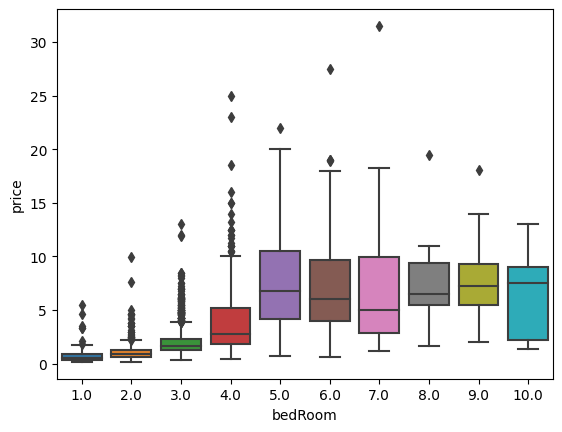

In [57]:
sns.boxplot(data=new_df,x='bedRoom',y='price')

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




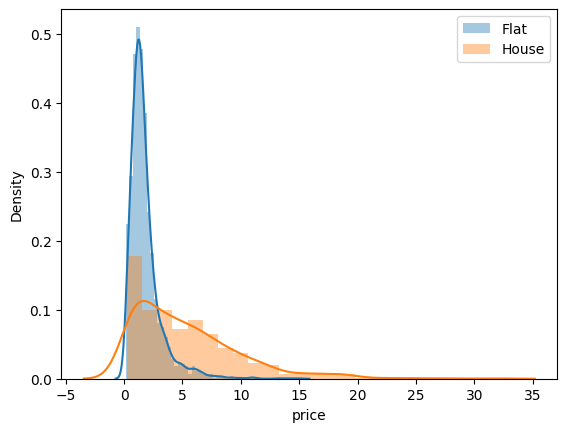

In [70]:
sns.distplot(new_df[new_df['property_type']=='flat']['price'],kde=True,label='Flat')
sns.distplot(new_df[new_df['property_type']=='house']['price'],kde=True,label='House')
plt.legend()
plt.show()